In [1]:
#Problem for Clustering 

#import libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#import Offer Information dataset as df
df = pd.read_excel('segment.xlsx', sheet_name=0)
df.head()

,Offer #,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


In [2]:
#import Transactions dataset as df1
df1 = pd.read_excel('segment.xlsx', sheet_name =1)
df1.head()

,Customer Last Name,Offer #
0,Smith,2
1,Smith,24
2,Johnson,17
3,Johnson,24
4,Johnson,26


In [3]:
#An additional column n is created, to indicate that the customer has bought an offer. 
df1['n'] = 1
df1.head()

,Customer Last Name,Offer #,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


In [4]:
#merge the two datasets 
data = pd.merge(df,df1)

#create a pivot-table to represent when a customer buys an offer 
matrix = data.pivot_table(index=['Customer Last Name'], columns=['Offer #'], values='n')

# fill NA values with 0 and make the index into a column
matrix = matrix.fillna(0).reset_index()

In [5]:
data.head()

,Offer #,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak,Customer Last Name,n
0,1,January,Malbec,72,56,France,False,Thomas,1
1,1,January,Malbec,72,56,France,False,Jackson,1
2,1,January,Malbec,72,56,France,False,Mitchell,1
3,1,January,Malbec,72,56,France,False,Peterson,1
4,1,January,Malbec,72,56,France,False,Wood,1


In [6]:
matrix.head()

Offer #,Customer Last Name,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [7]:
#Clustering process begins 

#Import KMeans from sci-kit learn
from sklearn.cluster import KMeans

#Dataset to be clustered is X
X=matrix.drop(['Customer Last Name'],axis=1)
X.head()

Offer #,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


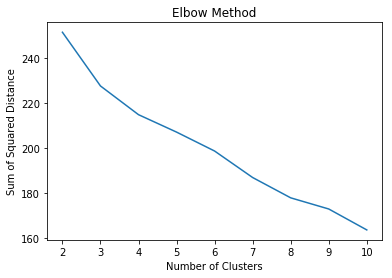

In [8]:
#Choosing the number of clusters using Elbow Method in the range 2-10
ss=[] #sum of squared distance variable
for i in range(2,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=0)
    kmeans.fit(X)
    #Compute within cluster sum of squared distance using inertia method
    ss.append(kmeans.inertia_)
#Plot Elbow Method graph between # of clusters and SS value 
plt.plot(range(2,11),ss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distance')
plt.show()

In [9]:
#Using graph, we take the no. of clusters to be 4 and group the data and store it as a part of the matrix table

kmeans = KMeans(n_clusters=4, init='k-means++', random_state = 0)
matrix['cluster'] = kmeans.fit_predict(X)
#The cluster column contains the cluster labels for each data point
matrix.cluster.value_counts()

3    36
2    35
1    16
0    13
Name: cluster, dtype: int64

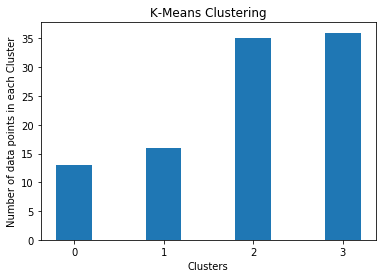

In [10]:
#Plotting a bar graph with cluster labels
unique, counts = np.unique(kmeans.labels_, return_counts=True)
plt.bar(unique, counts, align = 'center', width=0.4)
plt.xticks([0,1,2,3])
plt.xlabel('Clusters')
plt.ylabel('Number of data points in each Cluster')
plt.title('K-Means Clustering')
plt.show()

In [11]:
matrix.head()

Offer #,Customer Last Name,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,cluster
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2
1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3
2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
4,Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3


In [12]:


#PCA is imported in order to convert multidimentional dataset into two dimensional dataset with X and Y values

from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)
matrix['x'] = pca.fit_transform(X)[:,0]
matrix['y']= pca.fit_transform(X)[:,1]

matrix.head()

Offer #,Customer Last Name,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,cluster,x,y
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2,1.007580,0.108215
1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,-0.287539,0.044715
2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-0.392032,1.038391
3,Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0.699477,-0.022542
4,Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,0.088183,-0.471695


In [13]:
clus= matrix['cluster'].values
features = matrix.iloc[:,[34,35]].values



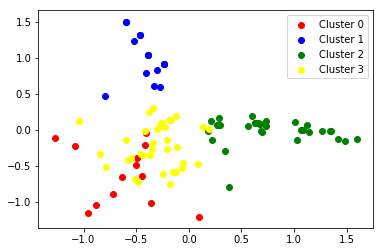

In [14]:
#create a scatter plot of clusters, using x and y values
color=['red','blue','green','yellow']
plt.scatter(features[clus==0,0], features[clus==0,1], c=color[0], label='Cluster 0')
plt.scatter(features[clus==1,0], features[clus==1,1], c=color[1], label='Cluster 1')
plt.scatter(features[clus==2,0], features[clus==2,1], c=color[2], label='Cluster 2')
plt.scatter(features[clus==3,0], features[clus==3,1], c=color[3], label='Cluster 3')

plt.legend() 

plt.show()


In [15]:
customer_clusters = matrix[['Customer Last Name', 'cluster', 'x', 'y']]
customer_clusters.head()

Offer #,Customer Last Name,cluster,x,y
0,Adams,2,1.007580,0.108215
1,Allen,3,-0.287539,0.044715
2,Anderson,1,-0.392032,1.038391
3,Bailey,2,0.699477,-0.022542
4,Baker,3,0.088183,-0.471695


In [16]:
#combine all columns into one table for ease 
data = pd.merge(df1, customer_clusters)
data = pd.merge(df, data)
data.head()



,Offer #,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak,Customer Last Name,n,cluster,x,y
0,1,January,Malbec,72,56,France,False,Thomas,1,3,-1.041879,0.122314
1,1,January,Malbec,72,56,France,False,Jackson,1,3,-0.839578,-0.328823
2,1,January,Malbec,72,56,France,False,Mitchell,1,3,-0.342938,0.302186
3,1,January,Malbec,72,56,France,False,Peterson,1,1,-0.797379,0.475995
4,1,January,Malbec,72,56,France,False,Wood,1,3,-0.551215,-0.395670


In [17]:
#Additional Segmentation and analysis can be done by comparing any of the attributes

'''We can separate the data in the clusters based on their varieties. Here cluster 1 products are compared to the other
clusters. The most bought in Cluster number 2 is Espumante at 32.'''
data['is_2'] = data.cluster==2
data.groupby("is_2").Varietal.value_counts()

is_2   Varietal          
False  Champagne             76
       Pinot Noir            44
       Cabernet Sauvignon    31
       Prosecco              23
       Malbec                16
       Chardonnay            15
       Merlot                14
       Espumante              8
       Pinot Grigio           1
True   Espumante             32
       Prosecco              20
       Malbec                16
       Pinot Grigio          16
       Merlot                 6
       Champagne              5
       Cabernet Sauvignon     1
Name: Varietal, dtype: int64

In [18]:
#We can also observe that the Minimum Qty of Cluster 2 is much less than the rest of the clusters 
data.groupby('is_2')[['Minimum Qty (kg)','Discount (%)']].mean()

,Minimum Qty (kg),Discount (%)
is_2,,
False,77.105263,61.372807
True,14.000000,54.989583


In [19]:
#These comparisons can be done for all clusters and with any of the attributes and their cluster groups